<a href="https://colab.research.google.com/github/jhnsnlim/aseng_api/blob/master/BBCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote
df = web.DataReader('BBCA.JK', data_source='yahoo', start='2015-01-01', end='2020-05-29')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,13275.0,13150.0,13275.0,13225.0,5860500.0,12170.641602
2015-01-05,13200.0,13125.0,13150.0,13200.0,5086900.0,12147.634766
2015-01-06,13200.0,13000.0,13000.0,13100.0,9736300.0,12055.606445
2015-01-07,13200.0,13050.0,13050.0,13125.0,8066800.0,12078.613281
2015-01-08,13150.0,12975.0,13125.0,12975.0,10891400.0,11940.572266
...,...,...,...,...,...,...
2020-05-20,24000.0,23450.0,23600.0,23825.0,23831600.0,23825.000000
2020-05-26,25000.0,23875.0,23875.0,24850.0,35215300.0,24850.000000
2020-05-27,25000.0,24275.0,24850.0,24825.0,30350700.0,24825.000000


In [4]:
#Get the number of rows & columns
df.shape

(1364, 6)

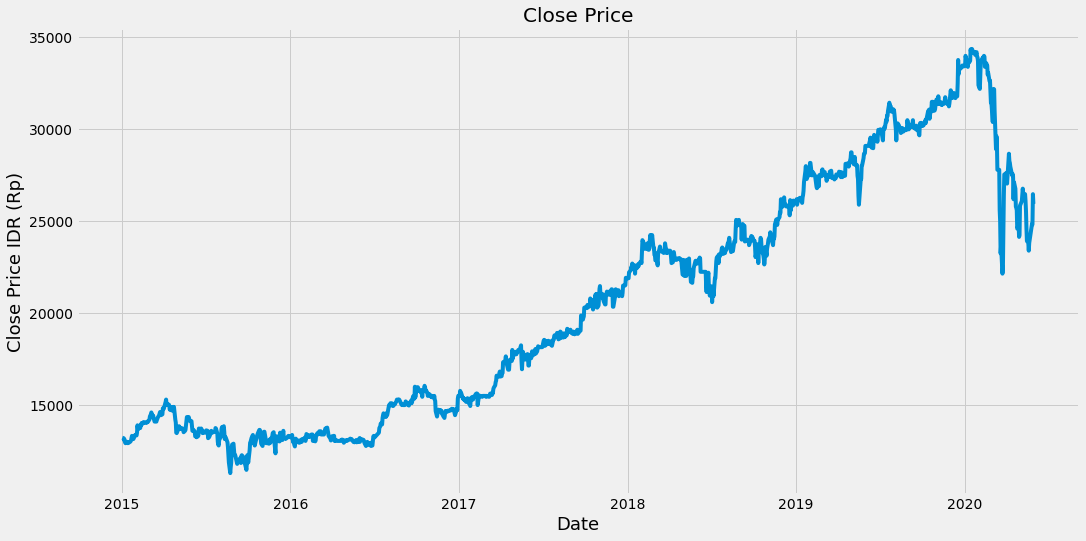

In [5]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.show()

In [6]:
#Create new df with only close column
data = df.filter(['Close'])
#Convert to numpy array
dataset = data.values
#Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1092

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.08342362],
       [0.0823402 ],
       [0.0780065 ],
       ...,
       [0.58613218],
       [0.65763814],
       [0.63488624]])

In [8]:
#Create training data set & scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.08342362, 0.0823402 , 0.0780065 , 0.07908992, 0.07258938,
       0.07042254, 0.07367281, 0.07367281, 0.07042254, 0.07150596,
       0.07150596, 0.07367281, 0.07475623, 0.07692308, 0.0823402 ,
       0.08775731, 0.08017335, 0.0823402 , 0.08559047, 0.08775731,
       0.08992416, 0.08884074, 0.09534128, 0.11267606, 0.10400867,
       0.10400867, 0.10834236, 0.10617551, 0.11375948, 0.11267606,
       0.11809317, 0.11700975, 0.12026002, 0.12026002, 0.1191766 ,
       0.11809317, 0.1191766 , 0.12134345, 0.12026002, 0.12134345,
       0.12676056, 0.13434453, 0.13542795, 0.13867822, 0.14301192,
       0.13326111, 0.13542795, 0.12892741, 0.12567714, 0.12134345,
       0.12351029, 0.12134345, 0.12676056, 0.12784399, 0.13109426,
       0.13651138, 0.14084507, 0.14409534, 0.13976165, 0.13651138])]
[0.13867822318526546]



In [0]:
#Convert x_train & y_train to np array
x_train, y_train = np.array(x_train), np.array(y_train)


In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1032, 60, 1)

In [0]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
#Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1032/1032 [==============================] - 37s 36ms/step - loss: 0.0014


In [0]:
#Create testing data set
test_data = scaled_data[training_data_len - 60:, :]
#Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
#Convert data to np array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean sqaured error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

168.97088264016543

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


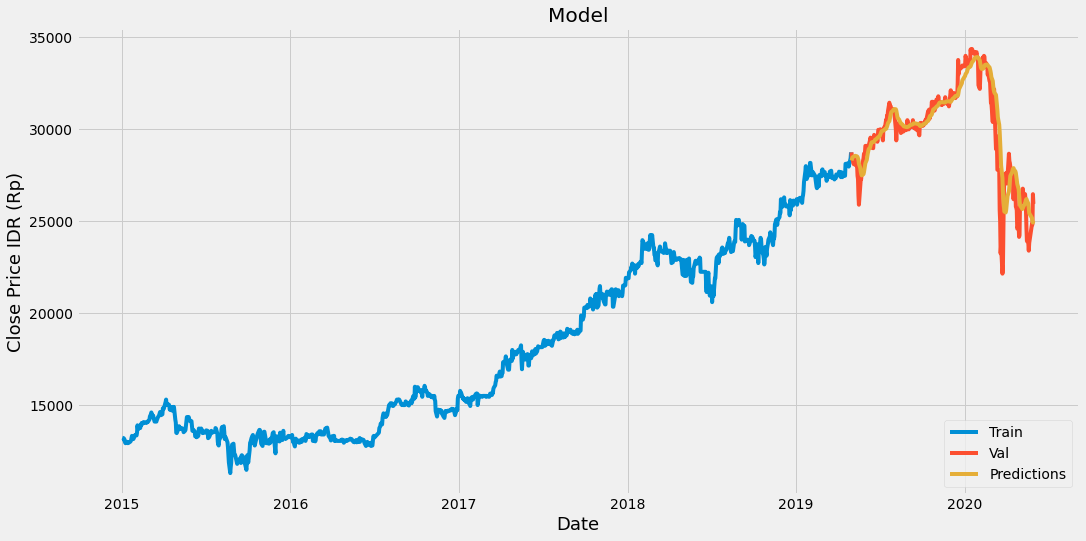

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid & predicted prices
valid

,Close,Predictions
Date,,
2019-05-01,28750.0,28307.619141
2019-05-02,28425.0,28403.117188
2019-05-03,28375.0,28475.005859
2019-05-06,28100.0,28525.097656
2019-05-07,28300.0,28539.458984
...,...,...
2020-05-20,23825.0,25439.177734
2020-05-26,24850.0,25178.072266
2020-05-27,24825.0,25018.851562


In [22]:
#Get the quote
bbca_quote = web.DataReader('BBCA.JK', data_source='yahoo', start='2015-01-01', end='2020-05-28')
#create new df
new_df = bbca_quote.filter(['Close'])
#get the last 60 days closing price & convert df to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#convert X_test to np array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[25133.2]]


In [24]:
#Get the quote
bbca_quote2 = web.DataReader('BBCA.JK', data_source='yahoo', start='2020-05-29', end='2020-05-29')
print(bbca_quote2['Close'])

Date
2020-05-29    25950
2020-05-29    25950
Name: Close, dtype: int64
